Pandas, NumPy, Matplotlib, and Seaborn imported. OS module ready. Warnings suppressed.

Loading data from: /Users/aishwarya/breast-cancer-diagnosis/data/raw/wdbc.data
Data loaded successfully!
Dataset shape: (569, 32)

--- Initial Data Inspection ---

First 5 rows of the dataset:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.

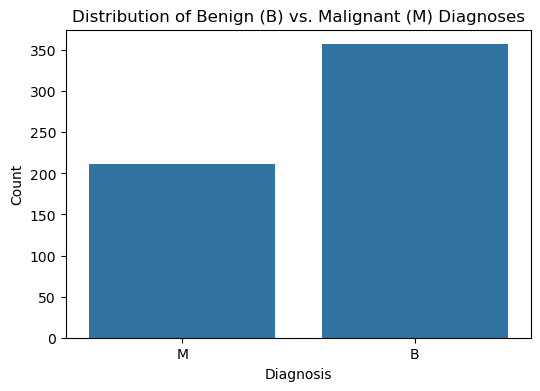


Initial data inspection complete. Data is ready for detailed EDA and preprocessing.


In [2]:
# notebooks/01_breast_cancer_diagnosis_eda.ipynb

# --- Section 1: Setup and Library Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys # For potential sys.exit()

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

print("Pandas, NumPy, Matplotlib, and Seaborn imported. OS module ready. Warnings suppressed.")

# --- Section 2: Load Data ---
# Define the local data file path (using absolute path for robustness)
data_filename = "wdbc.data"
# This constructs the path by going up from 'notebooks/' to the project root, then down into 'data/raw/'
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_filepath = os.path.join(project_root, "data", "raw", data_filename)

print(f"\nLoading data from: {data_filepath}")

# Check if the file exists before attempting to load
if not os.path.exists(data_filepath):
    print(f"Error: Data file not found at {data_filepath}. Please ensure 'wdbc.data' is in data/raw/.")
    sys.exit("Data loading failed. Exiting notebook execution.") # Exit cleanly if file not found

try:
    # Column names are not in the .data file, so we define them.
    # The dataset has an ID, then Diagnosis, then 30 features.
    # These feature names are standard for this dataset.
    features_mean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
    
    features_se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se',
                   'smoothness_se', 'compactness_se', 'concavity_se',
                   'concave_points_se', 'symmetry_se', 'fractal_dimension_se']
    
    features_worst = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                      'smoothness_worst', 'compactness_worst', 'concavity_worst',
                      'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
    
    # All columns in the order they appear in the file
    col_names = ['ID', 'Diagnosis'] + features_mean + features_se + features_worst
    
    # Load the CSV file. header=None because the file doesn't have a header row.
    df = pd.read_csv(data_filepath, header=None, names=col_names)
    
    print("Data loaded successfully!")
    print(f"Dataset shape: {df.shape}") # Expected (569, 32)

except Exception as e:
    print(f"Error loading data: {e}")
    print("Please ensure 'wdbc.data' is correctly placed and not corrupted.")
    sys.exit("Data loading failed. Exiting notebook.") # Exit cleanly on other errors

# --- Section 3: Initial Data Inspection (EDA - Part 1) ---
print("\n--- Initial Data Inspection ---")

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Info (columns, non-null counts, dtypes):")
df.info()

print("\nDescriptive statistics of numerical features:")
print(df.describe())

# Check for missing values (beyond what .info() might show if they are non-standard)
print("\nMissing values count per column:")
print(df.isnull().sum())

# Drop the ID column as it's not a feature for modeling
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("\n'ID' column dropped.")

# Check the distribution of the target variable
print("\nDistribution of Diagnosis (Target Variable):")
print(df['Diagnosis'].value_counts())
print(df['Diagnosis'].value_counts(normalize=True)) # Percentage

# Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Benign (B) vs. Malignant (M) Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

print("\nInitial data inspection complete. Data is ready for detailed EDA and preprocessing.")


--- Starting Data Preprocessing ---
Diagnosis column encoded: 'M' (Malignant) -> 1, 'B' (Benign) -> 0
Features (X) shape: (569, 30)
Target (y) shape: (569,)

Visualizing feature distributions per diagnosis (Box/Violin Plots):


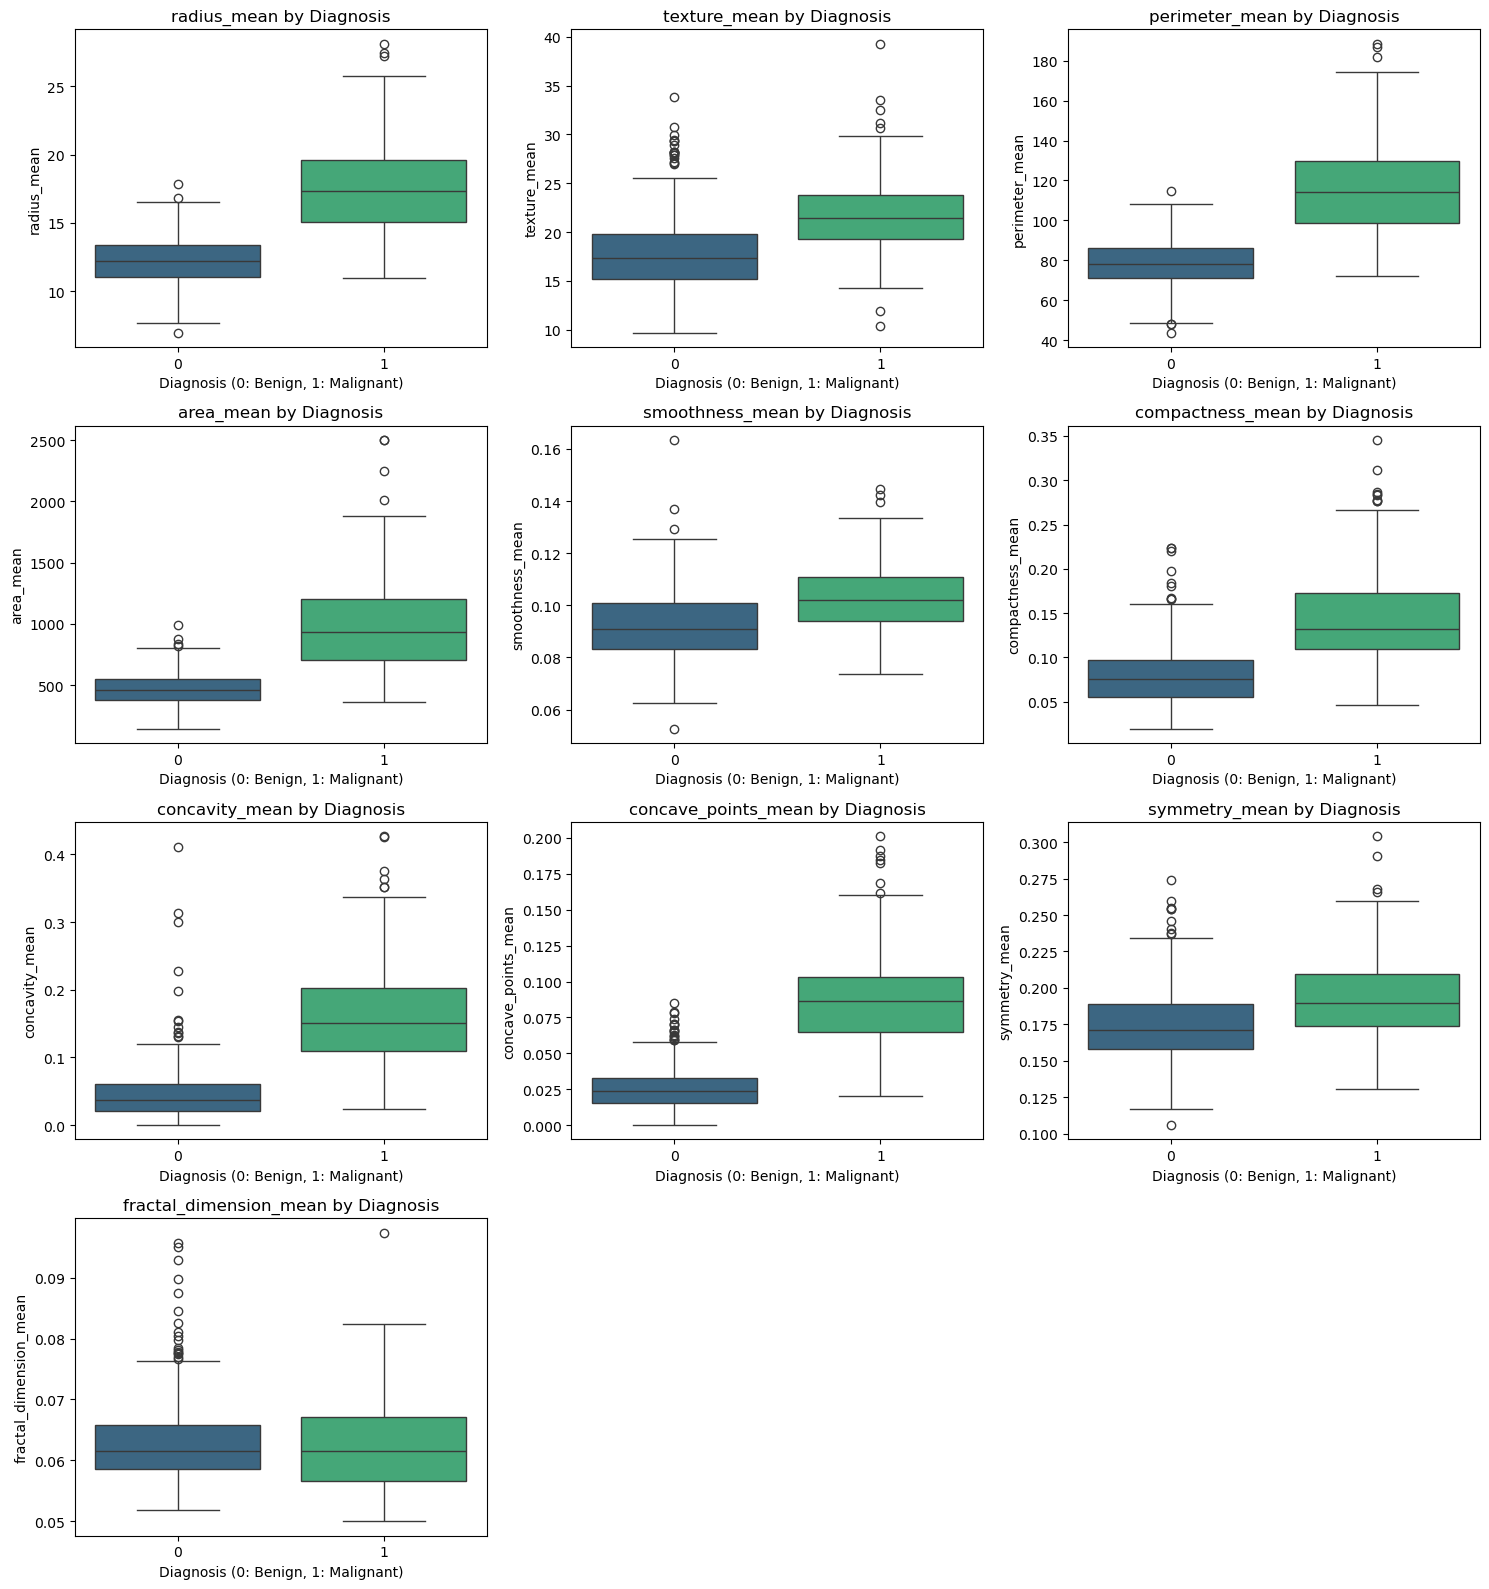


Visualizing correlation matrix:


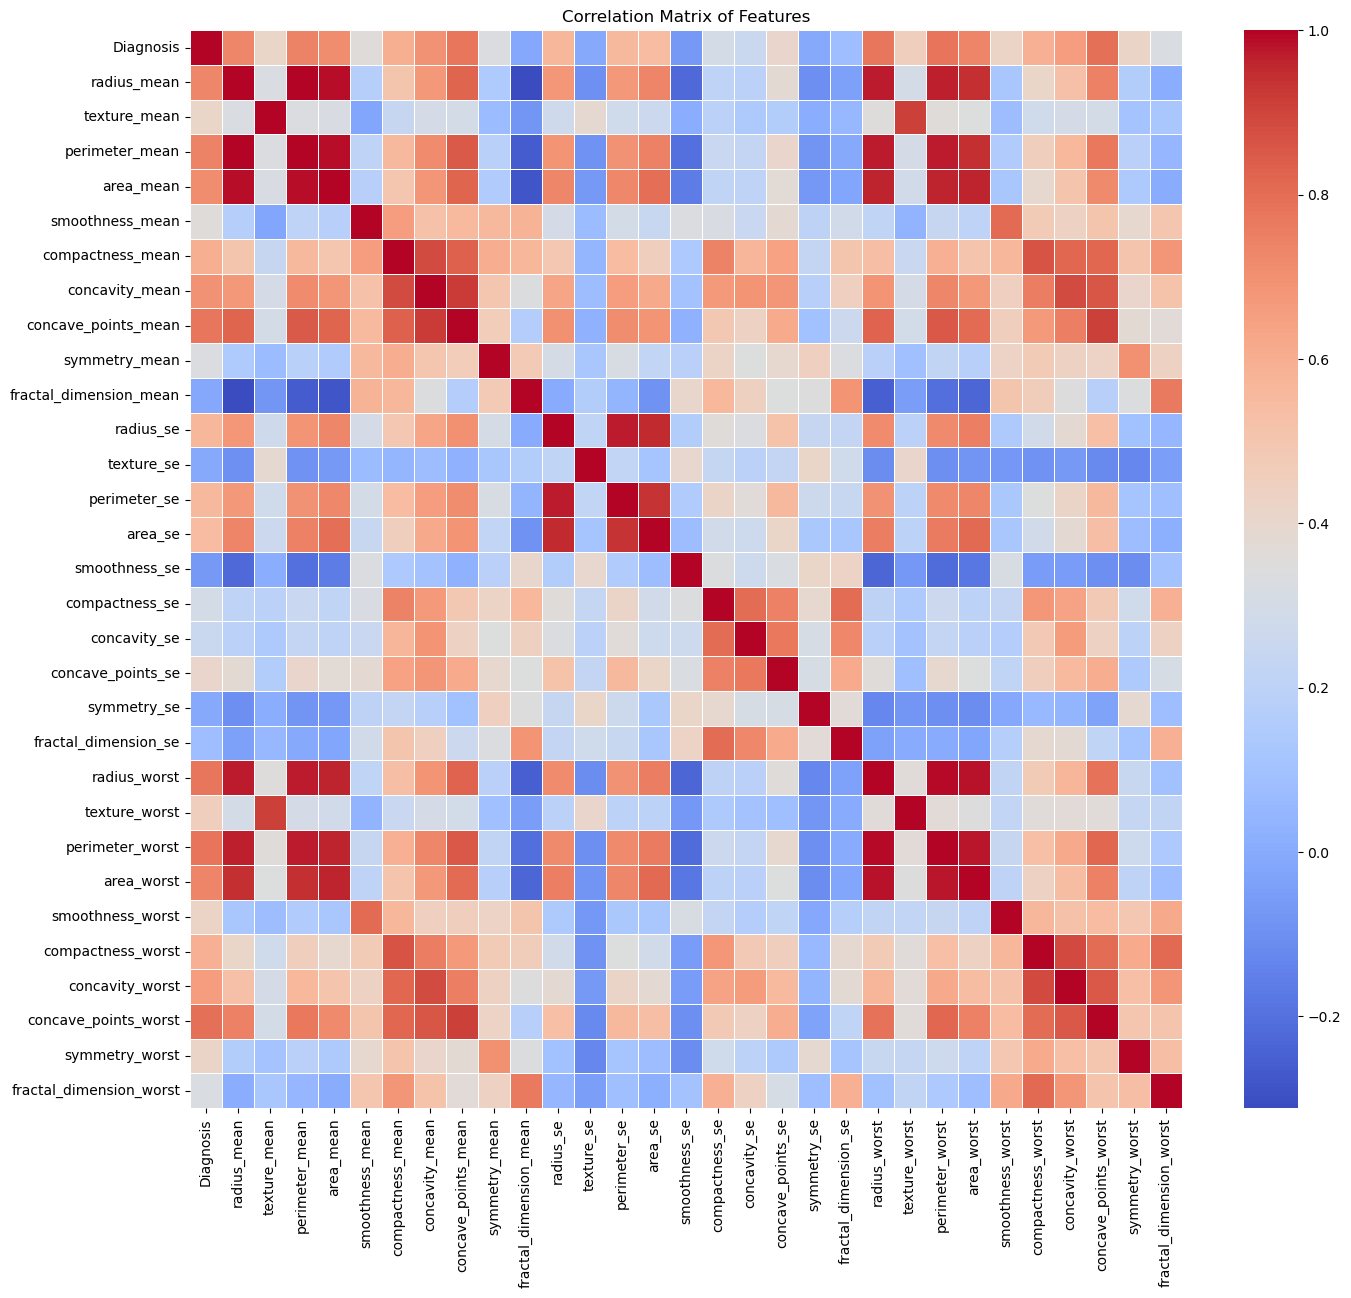


Top 10 Features correlated with Diagnosis (absolute value):
Diagnosis               1.000000
concave_points_worst    0.793566
perimeter_worst         0.782914
concave_points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: Diagnosis, dtype: float64

Features scaled using StandardScaler. Shape: (569, 30)

Data split into training and testing sets:
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)

Train-Test Split Diagnosis Distribution:
y_train distribution:
Diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64
y_test distribution:
Diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64

Data preprocessing complete. Data is ready for model building!


In [3]:


# --- Section 4: Data Preprocessing ---
print("\n--- Starting Data Preprocessing ---")

# Task 1: Target Variable Encoding
# 'M' (Malignant) to 1, 'B' (Benign) to 0
# Create a copy to avoid SettingWithCopyWarning
df_processed = df.copy() 
df_processed['Diagnosis'] = df_processed['Diagnosis'].map({'M': 1, 'B': 0})
print("Diagnosis column encoded: 'M' (Malignant) -> 1, 'B' (Benign) -> 0")

# Separate features (X) and target (y)
X = df_processed.drop('Diagnosis', axis=1)
y = df_processed['Diagnosis']
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


# Task 2: Feature-Target Relationship (Visual EDA) - Deeper Dive
# It's good to visualize how features differ between M and B classes.
# Pick a subset of features to avoid too many plots initially.
# Let's visualize the 'mean' features as they are usually most impactful.
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

print("\nVisualizing feature distributions per diagnosis (Box/Violin Plots):")
# Create subplots for better organization
n_cols = 3
n_rows = (len(mean_features) + n_cols - 1) // n_cols # Calculate rows needed
plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Adjust figure size

for i, feature in enumerate(mean_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Diagnosis', y=feature, data=df_processed, palette='viridis')
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

print("\nVisualizing correlation matrix:")
# Task 3: Correlation Analysis
# Calculate correlation matrix
correlation_matrix = df_processed.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(16, 14)) # Adjust size for readability
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Focus on correlations with the target variable 'Diagnosis'
print("\nTop 10 Features correlated with Diagnosis (absolute value):")
target_correlations = correlation_matrix['Diagnosis'].abs().sort_values(ascending=False)
print(target_correlations.head(11)) # +1 because Diagnosis correlates 1 with itself


# Task 4: Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Fit and transform on features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame
print(f"\nFeatures scaled using StandardScaler. Shape: {X_scaled_df.shape}")
# print("First 5 rows of scaled data:")
# print(X_scaled_df.head()) # Uncomment to see scaled data

# Task 5: Train-Test Split
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
# stratify=y ensures that the proportion of M and B is the same in both train and test sets
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nTrain-Test Split Diagnosis Distribution:")
print("y_train distribution:")
print(y_train.value_counts(normalize=True))
print("y_test distribution:")
print(y_test.value_counts(normalize=True))

print("\nData preprocessing complete. Data is ready for model building!")